# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

<h2 style="background-color:gray; color:White; text-align:leftr">Getting Started</h2>


Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/robertonacu/tmdb-kdramas-2022?select=networks.csv

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.


***

In [1]:
#import needed libraires with aliases
import pandas as pd #Python library that provides a concise way to manipulate data in tabular format
import numpy as np #scientific computing
import seaborn as sns #Python plotting library

import matplotlib.pyplot as plt #python's built in plotting methods
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# I have a total of 5 datasets to explore. *"I've made a huge mistake" #GOB Bluth voice*
    # I will look at each one individually for EDA.
    # The first one - series - is the largest with 22 columns and is the one that the other 4 data sets are based on
    # I'm keeping the naming simple and foregoing the added "_df" and letting it be assumed
    # the other df's will be named: genres, networks, people, and production_companies

# read in and name primary dataset
series = pd.read_csv("series.csv")


# Verifying proper inportation of the dataframe for the main dataset and browsing data stored in each column
series.head()

# I really like how the columns are named
    # No guessing or need to refer back to Kaggle for explanations!
    # They are mostly self explanatory with no abbreviations and I most likely won't need to do any coded renaming of columns, which is great

,tmdb_id,name,original_name,keywords,airing_date,poster_img_url,background_img_url,directors_ids,cast_ids,genres_ids,...,episode_run_time,synopsis,popularity,average_rating,rating_count,next_episode_to_air,next_episode_air_date,origin_country,networks_ids,production_companies_ids
0,208249,Game of Witches,마녀의 게임,NaN,2022-10-11,https://image.tmdb.org/t/p/w500/9bTjPzX48VZGal...,https://image.tmdb.org/t/p/original/akjmJsCDpv...,NaN,"582555, 2117665, 1066220","18, 80, 9648",...,30.0,Yu Kyung is a successful woman who is proficie...,414.151,NaN,NaN,25.0,2022-11-14,KR,97,"26511, 136349"
1,99966,All of Us Are Dead,지금 우리 학교는,"high school, bullying, based on comic, horror,...",2022-01-28,https://image.tmdb.org/t/p/w500/6zUUtzj7aJzOdo...,https://image.tmdb.org/t/p/original/8Xs20y8gFR...,1182291,"2125084, 1493898, 2185341, 2074587, 2402531, 1...","10759, 18, 10765",...,65.0,A high school becomes ground zero for a zombie...,398.111,8.421,2750.0,NaN,NaN,KR,213,"56797, 86981, 113553"
2,112888,True Beauty,여신강림,"high school, beauty, makeover, hidden identity...",2020-12-09,https://image.tmdb.org/t/p/w500/sld43SJArZqlnA...,https://image.tmdb.org/t/p/original/31N42Lhrxl...,NaN,"1252016, 1604826, 2333298, 2175208, 1108037, 1...","35, 18",...,75.0,Lim Ju-kyung is a high school student. Since s...,396.708,8.524,1156.0,NaN,NaN,KR,NaN,"36225, 86418, 119174"
3,93405,Squid Game,오징어 게임,"secret organization, challenge, survival, fict...",2021-09-17,https://image.tmdb.org/t/p/w500/dDlEmu3EZ0Pgg9...,https://image.tmdb.org/t/p/original/4y6kEEfdrN...,1294471,"73249, 1593672, 3194501, 1557181, 1048070, 191...","10759, 9648, 18",...,54.0,Hundreds of cash-strapped players accept a str...,323.945,7.835,11835.0,NaN,NaN,KR,213,112647
4,211174,Vengeance of the Bride,태풍의 신부,"revenge, daughter–in–law, enemy, woman",2022-10-10,https://image.tmdb.org/t/p/w500/aHUyK2XA76mn9G...,https://image.tmdb.org/t/p/original/5gGfJIMB2y...,NaN,"1568455, 1368061, 1940498, 1233712, 139509, 17...","18, 9648, 10751",...,40.0,The story of a woman who becomes the daughter-...,302.588,NaN,NaN,26.0,2022-11-14,KR,342,77994


In [2]:
# reading in the other 4 df's: genres, networks, people, and production_companies
genres = pd.read_csv("genres.csv")
networks = pd.read_csv("networks.csv")
people = pd.read_csv("people.csv")
production_companies = pd.read_csv("production_companies.csv")

<span style="background-color:blue; color:blue;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ------------------------------------------------- -</span> 



***

<h2 style="background-color:gray; color:White; text-align:center">Get to Know the Numbers</h2>

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.
***

In [3]:
#making sure the full list of rows show when i look at the head of the table
pd.options.display.max_colwidth

50

In [4]:

pd.options.display.max_rows

60

### Series

In [5]:
# listing all of the column names
series.columns

Index(['tmdb_id', 'name', 'original_name', 'keywords', 'airing_date',
       'poster_img_url', 'background_img_url', 'directors_ids', 'cast_ids',
       'genres_ids', 'number_of_seasons', 'number_of_episodes',
       'episode_run_time', 'synopsis', 'popularity', 'average_rating',
       'rating_count', 'next_episode_to_air', 'next_episode_air_date',
       'origin_country', 'networks_ids', 'production_companies_ids'],
      dtype='object')

In [6]:
#looking at the count for network ids because that may be something interesting to explore in Tableua later
#each unique combination of network ids is counted separately so it would look different if the data was flattened or pivoted
series.groupby('networks_ids').count()

,tmdb_id,name,original_name,keywords,airing_date,poster_img_url,background_img_url,directors_ids,cast_ids,genres_ids,...,number_of_episodes,episode_run_time,synopsis,popularity,average_rating,rating_count,next_episode_to_air,next_episode_air_date,origin_country,production_companies_ids
networks_ids,,,,,,,,,,,,,,,,,,,,,
1024,1,1,1,0,1,1,1,0,1,1,...,1,1,1,1,0,0,0,0,1,1
1081,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,0,0,0,0,1,0
1152,50,50,50,31,50,49,41,1,49,50,...,50,47,50,50,35,35,0,0,50,16
"1152, 1244",1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,0,0,0,0,1,0
"1152, 1330",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"97, 1152, 2433",1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,1
"97, 1234",1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,1
"97, 2433",1,1,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,1


In [7]:
#checking the max amount of rows that show. right now, its 60
pd.options.display.max_rows

60

In [8]:
#I wanted to be able to see the full list above so I upped the number of max rows to 200
pd.options.display.max_rows = 200

In [9]:
# looking at the data types associated with the columns and getting a look at which columns are missing data and how much
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tmdb_id                   1514 non-null   int64  
 1   name                      1514 non-null   object 
 2   original_name             1514 non-null   object 
 3   keywords                  972 non-null    object 
 4   airing_date               1450 non-null   object 
 5   poster_img_url            1420 non-null   object 
 6   background_img_url        1182 non-null   object 
 7   directors_ids             164 non-null    object 
 8   cast_ids                  1474 non-null   object 
 9   genres_ids                1514 non-null   object 
 10  number_of_seasons         1510 non-null   float64
 11  number_of_episodes        1501 non-null   float64
 12  episode_run_time          1294 non-null   float64
 13  synopsis                  1436 non-null   object 
 14  populari

In [10]:
#further exploration of series
series.describe()

# interesting that there is a popularity rating for each record but some are missing avg rating and rating count
# the next...air column calculations don't mean anything because this column represents dates and aggregates aren't valid
#1585 for max episode run time seems extreme and like a mistake unless its some show that followed people over the course of a day AND broadcast or uploaded it? I'll want to find this instance in cleaning checkpoint
# number of seasons looks accurate just from my knoweledge of watching shows, I noticed that a second season is rare, nearly no-existant
#1 min run time and 1 episode both sound suspicious. i'll have to find which show and verify its not a mistake. from my experience watching, I can say that most having an avg run time of over an hour sounds about right!

,tmdb_id,number_of_seasons,number_of_episodes,episode_run_time,popularity,average_rating,rating_count,next_episode_to_air
count,1514.000000,1510.000000,1501.000000,1294.000000,1514.000000,1127.000000,1127.000000,36.000000
mean,85302.124835,1.076159,26.246502,53.762751,10.598843,7.509714,51.498669,7.416667
std,49546.561615,0.527722,34.041101,54.882509,26.119971,1.308382,388.931765,12.248324
min,333.000000,1.000000,1.000000,1.000000,0.600000,0.500000,1.000000,1.000000
25%,50597.000000,1.000000,11.000000,35.000000,2.027000,7.000000,2.000000,1.000000
50%,75525.000000,1.000000,16.000000,60.000000,4.942500,7.800000,5.000000,2.000000
75%,113570.500000,1.000000,24.000000,65.000000,10.140250,8.300000,15.000000,7.500000
max,214406.000000,12.000000,476.000000,1585.000000,414.151000,10.000000,11835.000000,63.000000


In [64]:
#trying to find where this episode run time outlier is so I can know what to do with it in next step
series.loc[series['episode_run_time']=='1585']


,tmdb_id,name,original_name,keywords,airing_date,poster_img_url,background_img_url,directors_ids,cast_ids,genres_ids,...,episode_run_time,synopsis,popularity,average_rating,rating_count,next_episode_to_air,next_episode_air_date,origin_country,networks_ids,production_companies_ids


In [66]:
#sorting by pupularity and taking a look at which years are at the top. its mostly shows from the past two years
#okay, so I found it and there are just two that are outliers. With there being so many records, 
    #I don't think this impacts the overall nubmers much so I will probably leave it
series_sorted = series.sort_values(by=["episode_run_time"], ascending=False)

# Viewing the sorted table
series_sorted.head(10)

,tmdb_id,name,original_name,keywords,airing_date,poster_img_url,background_img_url,directors_ids,cast_ids,genres_ids,...,episode_run_time,synopsis,popularity,average_rating,rating_count,next_episode_to_air,next_episode_air_date,origin_country,networks_ids,production_companies_ids
160,67014,"Hello, My Twenties!",청춘시대,"way of life, group dynamics, boarding house, t...",2016-07-22,https://image.tmdb.org/t/p/w500/hIbMbotFKAFs0B...,https://image.tmdb.org/t/p/original/nhFi3zziBL...,NaN,"1057068, 1122532, 1134684, 1746547, 1855455, 1...","35, 18, 9648",...,1585.0,"With different personalities, life goals and t...",20.995,7.311,90.0,NaN,NaN,KR,885,"86981, 90935, 113206, 144417, 172185"
483,61739,Blade Man,아이언맨,"supernatural, secretary, mental health, ceo, p...",2014-09-10,https://image.tmdb.org/t/p/w500/pRt6yU9zAJfzc9...,https://image.tmdb.org/t/p/original/pvsWjucGkY...,NaN,"1238592, 126348, 1222431, 83683, 16288, 125124...","18, 10765",...,1080.0,"Despite his wealth, Joo Hong Bin (Lee Dong Woo...",7.807,6.250,8.0,NaN,NaN,KR,342,"68635, 77994, 167653"
101,96102,Hospital Playlist,슬기로운 의사생활,"friendship, behind the scenes, hospital, docto...",2020-03-12,https://image.tmdb.org/t/p/w500/clYgUKk4CzmKpE...,https://image.tmdb.org/t/p/original/9iypSe1gvj...,1691328,"1223316, 1330423, 79578, 587675, 2539185, 9325...","18, 35",...,93.0,Every day is extraordinary for five doctors an...,29.141,8.400,74.0,NaN,NaN,KR,NaN,"128404, 129223"
218,74821,Prison Playbook,슬기로운 감빵생활,"prison, corruption, prisoner, gangster, baseba...",2017-11-22,https://image.tmdb.org/t/p/w500/ottJJwC1bLjCd1...,https://image.tmdb.org/t/p/original/4QndLm5U0s...,2341408,"1593672, 79578, 1330917, 1916075, 240081, 1475...","35, 18",...,92.0,With his major league baseball debut right aro...,15.186,8.439,49.0,NaN,NaN,KR,213,NaN
386,70123,New Journey to the West,신서유기,"games, game show, travel, variety show",2015-09-04,https://image.tmdb.org/t/p/w500/gUTettmcgOOO4T...,https://image.tmdb.org/t/p/original/8gQfPNy7yi...,NaN,"1250840, 1250841, 1239242, 1757798, 1878886, 1...","18, 35",...,90.0,Each member takes one of the characters from t...,9.517,9.200,6.0,NaN,NaN,KR,NaN,"128404, 129223"
171,76662,My Mister,나의 아저씨,"depression, infidelity, hardship, healing, pow...",2018-03-21,https://image.tmdb.org/t/p/w500/o5cBRMF6syh4yU...,https://image.tmdb.org/t/p/original/i7prwa7UwO...,1702876,"115290, 1252318, 936000, 1872629, 1299516, 124...",18,...,90.0,"In a world that is less than kind, a young wom...",19.497,8.300,73.0,NaN,NaN,KR,NaN,"70599, 86418"
92,108291,Snowdrop,설강화,"presidential election, love at first sight, ho...",2021-12-18,https://image.tmdb.org/t/p/w500/3AhTqNJVr1v7Jf...,https://image.tmdb.org/t/p/original/4hXEVbqGLM...,NaN,"1470763, 1875840, 1254169, 1487428, 232408, 22...","18, 10766, 10768",...,86.0,"A desperate love story between Young-ro, a you...",32.377,8.400,132.0,NaN,NaN,KR,885,"86981, 172185"
904,127016,The Road: The Tragedy of One,더 로드: 1의 비극,"journalist, husband wife relationship, based o...",2021-08-04,https://image.tmdb.org/t/p/w500/3keYipzOL1qD6r...,https://image.tmdb.org/t/p/original/7tuQ5hQ5Ks...,NaN,"145989, 232408, 1299278, 87090, 96659, 223144,...","18, 9648",...,85.0,A terrible child kidnapping incident takes pla...,4.133,9.000,2.0,NaN,NaN,KR,NaN,86418
392,85405,The Crowned Clown,왕이 된 남자,"politics, romance, remake, historical fiction,...",2019-01-07,https://image.tmdb.org/t/p/w500/3UxIBzQV4AYtNL...,https://image.tmdb.org/t/p/original/ai9A5QFGdn...,550683,"1207629, 1257142, 69378, 1237913, 1096793, 554...","18, 10759",...,85.0,The story takes place at a time in Joseon hist...,9.475,8.500,12.0,NaN,NaN,KR,NaN,"86418, 116612"
26,94796,Crash Landing on You,사랑의 불시착,"love triangle, spy, con man, romance, tension,...",2019-12-14,https://image.tmdb.org/t/p/w500/bXo9sDqMmo4dEO...,https://image.tmdb.org/t/p/original/o3Htmlg6Bf...,NaN,"544107, 86889, 127708, 20264, 1257611, 2526744...","18, 35, 10768",...,85.0,A paragliding mishap drops a South Korean heir...,61.043,8.700,

In [11]:
#seeing how many unique values there are in each column
#colums that have low amounts of unique values work better as categorical values sometimes 
    #(thinking ahead to Tableau visualizations)
series.nunique()

tmdb_id                     1514
name                        1501
original_name               1504
keywords                     850
airing_date                 1225
poster_img_url              1420
background_img_url          1182
directors_ids                124
cast_ids                    1474
genres_ids                   141
number_of_seasons              9
number_of_episodes           117
episode_run_time              83
synopsis                    1435
popularity                  1336
average_rating               291
rating_count                 157
next_episode_to_air           11
next_episode_air_date         19
origin_country                 6
networks_ids                 112
production_companies_ids     378
dtype: int64

In [12]:
series.isnull().sum()

tmdb_id                        0
name                           0
original_name                  0
keywords                     542
airing_date                   64
poster_img_url                94
background_img_url           332
directors_ids               1350
cast_ids                      40
genres_ids                     0
number_of_seasons              4
number_of_episodes            13
episode_run_time             220
synopsis                      78
popularity                     0
average_rating               387
rating_count                 387
next_episode_to_air         1478
next_episode_air_date       1478
origin_country                46
networks_ids                 205
production_companies_ids     608
dtype: int64

In [13]:
#seeing how significant a percentage the null values are in each column
for col in series.columns:
    pct_missing = np.mean(series[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

tmdb_id - 0%
name - 0%
original_name - 0%
keywords - 36%
airing_date - 4%
poster_img_url - 6%
background_img_url - 22%
directors_ids - 89%
cast_ids - 3%
genres_ids - 0%
number_of_seasons - 0%
number_of_episodes - 1%
episode_run_time - 15%
synopsis - 5%
popularity - 0%
average_rating - 26%
rating_count - 26%
next_episode_to_air - 98%
next_episode_air_date - 98%
origin_country - 3%
networks_ids - 14%
production_companies_ids - 40%


In [14]:
# sorting by popularity rating and then the average)rating, with the highest at the top of the list
#just looking to see if I noticed any patterns. I see that two copmanies have two shows raking in the top five in popularity
series_sorted = series.sort_values(by=["popularity", "average_rating"], ascending=False)

# Viewing the sorted table
series_sorted

,tmdb_id,name,original_name,keywords,airing_date,poster_img_url,background_img_url,directors_ids,cast_ids,genres_ids,...,episode_run_time,synopsis,popularity,average_rating,rating_count,next_episode_to_air,next_episode_air_date,origin_country,networks_ids,production_companies_ids
0,208249,Game of Witches,마녀의 게임,NaN,2022-10-11,https://image.tmdb.org/t/p/w500/9bTjPzX48VZGal...,https://image.tmdb.org/t/p/original/akjmJsCDpv...,NaN,"582555, 2117665, 1066220","18, 80, 9648",...,30.0,Yu Kyung is a successful woman who is proficie...,414.151,NaN,NaN,25.0,2022-11-14,KR,97,"26511, 136349"
1,99966,All of Us Are Dead,지금 우리 학교는,"high school, bullying, based on comic, horror,...",2022-01-28,https://image.tmdb.org/t/p/w500/6zUUtzj7aJzOdo...,https://image.tmdb.org/t/p/original/8Xs20y8gFR...,1182291,"2125084, 1493898, 2185341, 2074587, 2402531, 1...","10759, 18, 10765",...,65.0,A high school becomes ground zero for a zombie...,398.111,8.421,2750.0,NaN,NaN,KR,213,"56797, 86981, 113553"
2,112888,True Beauty,여신강림,"high school, beauty, makeover, hidden identity...",2020-12-09,https://image.tmdb.org/t/p/w500/sld43SJArZqlnA...,https://image.tmdb.org/t/p/original/31N42Lhrxl...,NaN,"1252016, 1604826, 2333298, 2175208, 1108037, 1...","35, 18",...,75.0,Lim Ju-kyung is a high school student. Since s...,396.708,8.524,1156.0,NaN,NaN,KR,NaN,"36225, 86418, 119174"
3,93405,Squid Game,오징어 게임,"secret organization, challenge, survival, fict...",2021-09-17,https://image.tmdb.org/t/p/w500/dDlEmu3EZ0Pgg9...,https://image.tmdb.org/t/p/original/4y6kEEfdrN...,1294471,"73249, 1593672, 3194501, 1557181, 1048070, 191...","10759, 9648, 18",...,54.0,Hundreds of cash-strapped players accept a str...,323.945,7.835,11835.0,NaN,NaN,KR,213,112647
4,211174,Vengeance of the Bride,태풍의 신부,"revenge, daughter–in–law, enemy, woman",2022-10-10,https://image.tmdb.org/t/p/w500/aHUyK2XA76mn9G...,https://image.tmdb.org/t/p/original/5gGfJIMB2y...,NaN,"1568455, 1368061, 1940498, 1233712, 139509, 17...","18, 9648, 10751",...,40.0,The story of a woman who becomes the daughter-...,302.588,NaN,NaN,26.0,2022-11-14,KR,342,77994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,18481,Romance Zero,하자 전담반 제로,NaN,2009-02-14,NaN,NaN,NaN,"1215711, 1222436, 124395, 1493548","18, 35",...,NaN,Romance Zero is a 2009 South Korean television...,0.600,NaN,NaN,NaN,NaN,KR,97,NaN
1510,16704,Sunok,순옥이,NaN,NaN,NaN,NaN,NaN,"1257598, 1223136, 1622172, 68464, 553710, 1622771",18,...,NaN,Sunok is a Korean KBS1 television drama that s...,0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1511,15431,Your Scene,그대의 풍경,NaN,NaN,NaN,NaN,NaN,NaN,18,...,NaN,Your Scene is a KBS drama that began airing on...,0.600,NaN,NaN,NaN,NaN,NaN,829,NaN
1512,14295,Love In 3 Colors,유정,NaN,NaN,NaN,NaN,NaN,NaN,18,...,NaN,Love in 3 Colors is a 1999 South Korean televi...,0.600,NaN,NaN,NaN,NaN,NaN,342,NaN


In [15]:
#looking at which genres most shows fall into
#will be intresting to see how this works out because many shows have multiple genres represented
#so we're not seeing the total counts for individual genres because cells have multiple genres in one and each unique combination is counted individually
series.genres_ids.value_counts()

18                                 680
35, 18                             157
18, 35                             105
18, 10751                           52
18, 9648                            33
18, 10749                           30
18, 10765                           30
10759, 18                           28
9648, 18                            21
35, 18, 10751                       21
80, 18                              20
10751, 18                           19
18, 10751, 10749                    17
18, 80                              15
10765, 18                           13
35, 18, 10765                       11
35, 18, 10749                       11
18, 10759                           10
80, 18, 9648                        10
18, 80, 9648                        10
18, 10768                            9
35, 18, 9648                         7
10768, 18                            7
18, 9648, 10765                      6
9648, 18, 80                         6
10759, 35, 18            

### Genres

In [16]:
genres.describe()

,tmdb_id
count,15.000000
mean,6401.066667
std,5377.237853
min,16.000000
25%,58.000000
50%,10749.000000
75%,10763.000000
max,10768.000000


In [17]:
#two columns. smallest dataset of the five
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tmdb_id  15 non-null     int64 
 1   name     15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [18]:
#no nulls! only two columns and both are relavant so nothing to clean in the next checkpoint

genres.isnull().sum()

tmdb_id    0
name       0
dtype: int64

In [19]:
#this is the complete genres dataset displayed
genres

,tmdb_id,name
0,18,Drama
1,80,Crime
2,9648,Mystery
3,10759,Action & Adventure
4,10765,Sci-Fi & Fantasy
5,35,Comedy
6,10751,Family
7,10768,War & Politics
8,10766,Soap
9,36,History


### Networks


In [20]:
#taking a quick look at how many records there are and columns. 
    #there are 77 networks in this dataset
    
networks.shape


(77, 6)

In [21]:
#I looked at the full table of this in Kaggle and found it strange that large US companies 
    #such as Amazon, Netflix and Youtube don't have values for Country of Origin

networks.isnull().sum()

tmdb_id            0
name               0
headquarters      29
homepage          14
logo_path         15
origin_country    14
dtype: int64

In [22]:
networks.nunique()

tmdb_id           77
name              77
headquarters      27
homepage          60
logo_path         62
origin_country     8
dtype: int64

In [23]:
networks.groupby('origin_country').head()

,tmdb_id,name,headquarters,homepage,logo_path,origin_country
0,3266,GagaOOLala,NaN,https://www.gagaoolala.com,https://image.tmdb.org/t/p/original/7pXbP8D3T3...,TW
1,1923,KBS Joy,"Mapo, Seoul",http://www.kbsn.co.kr/njoy/index,https://image.tmdb.org/t/p/original/ns8dF9ebIf...,KR
2,2974,Lifetime,Seoul,http://lifetimekorea.kr,https://image.tmdb.org/t/p/original/kEeaVLcJ6L...,KR
3,1671,LINE TV,NaN,https://tv.line.me,https://image.tmdb.org/t/p/original/eBK2WsrRlp...,TH
4,3869,U-NEXT,"Kamiōsaki, Shinagawa, Tokyo",https://www.unext.co.jp,https://image.tmdb.org/t/p/original/4g6nXkkCQ3...,JP
5,1260,Sohu,Beijing,https://tv.sohu.com,https://image.tmdb.org/t/p/original/2Ew6jjFlEP...,CN
6,2433,V LIVE,"Seongnam, Gyeonggi",http://www.vlive.tv,https://image.tmdb.org/t/p/original/bISjuts7UG...,KR
7,3897,TVING,"Mapo, Seoul",http://tving.com/,https://image.tmdb.org/t/p/original/cfMtt9sNl2...,KR
8,2007,Tencent Video,"Shenzhen, Guangdong",https://v.qq.com,https://image.tmdb.org/t/p/original/uBCIoV9AUG...,CN
10,5169,Coupang Play,"Songpa, Seoul",https://www.coupangplay.com/home,https://image.tmdb.org/t/p/original/cCAgZ4xspf...,KR


In [24]:
#grouped by the network's country of origin to see if there was anything interesting in the spread or distribution of 
    #countires. There's not. Most of them originate in KR so this won't show anything interesting on a chart later
networks.groupby('origin_country').count()

,tmdb_id,name,headquarters,homepage,logo_path
origin_country,,,,,
CN,4,4,4,4,4
DE,1,1,0,1,1
HK,1,1,0,1,1
JP,2,2,1,2,2
KR,47,47,36,44,41
TH,2,2,0,1,2
TW,2,2,0,2,2
US,4,4,4,4,4


In [25]:
#not a lot of values in this dataset so I'm looking at percentages to see how big
    #of a deal it is to isnull sums like 29 and 14 from a column
    #since this is a small set, missing an entry for 29 records is a big impact
    #I'll only keep the first two columns from this set
    
for col in networks.columns:
    pct_missing = np.mean(networks[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

tmdb_id - 0%
name - 0%
headquarters - 38%
homepage - 18%
logo_path - 19%
origin_country - 18%


In [26]:

networks.head()


,tmdb_id,name,headquarters,homepage,logo_path,origin_country
0,3266,GagaOOLala,NaN,https://www.gagaoolala.com,https://image.tmdb.org/t/p/original/7pXbP8D3T3...,TW
1,1923,KBS Joy,"Mapo, Seoul",http://www.kbsn.co.kr/njoy/index,https://image.tmdb.org/t/p/original/ns8dF9ebIf...,KR
2,2974,Lifetime,Seoul,http://lifetimekorea.kr,https://image.tmdb.org/t/p/original/kEeaVLcJ6L...,KR
3,1671,LINE TV,NaN,https://tv.line.me,https://image.tmdb.org/t/p/original/eBK2WsrRlp...,TH
4,3869,U-NEXT,"Kamiōsaki, Shinagawa, Tokyo",https://www.unext.co.jp,https://image.tmdb.org/t/p/original/4g6nXkkCQ3...,JP


In [27]:

networks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tmdb_id         77 non-null     int64 
 1   name            77 non-null     object
 2   headquarters    48 non-null     object
 3   homepage        63 non-null     object
 4   logo_path       62 non-null     object
 5   origin_country  63 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.7+ KB


In [28]:
networks.describe()

,tmdb_id
count,77.000000
mean,2687.519481
std,1745.770819
min,97.000000
25%,1234.000000
50%,2487.000000
75%,3747.000000
max,6120.000000


### People

In [29]:
people.isnull().sum()

tmdb_id                    0
name                       0
biography               2763
place_of_birth          1614
birthday                 637
deathday                3425
gender                   530
known_for_department       0
popularity                 0
profile_img_url          739
dtype: int64

In [30]:
#taking a quick look at shape of this data set
#this set has the highest number of entries/rows of the five datasets. it makes sense for this to have many more rows because each series has multiple people associated with it

people.shape

(3465, 10)

In [31]:
people.nunique()

tmdb_id                 3465
name                    3374
biography                688
place_of_birth           303
birthday                2575
deathday                  40
gender                     2
known_for_department       2
popularity              1898
profile_img_url         2726
dtype: int64

In [32]:
people.known_for_department.value_counts()


Acting       3342
Directing     123
Name: known_for_department, dtype: int64

In [33]:
#the dataset notes that the gender column is the gender of the person (1 female, 2 male)
    #since its binary, I'm assuming that what this column really gathered is the sex of the person or their assumed gender based on appearance
    #i know its a common practice to do this but I , nevertheless, am gong to note (rant?) that i don't think its appropriate that datasets use 
    #the term gender unless its from a survey of a population where those surveyed input thier gender themselves
people.head()


,tmdb_id,name,biography,place_of_birth,birthday,deathday,gender,known_for_department,popularity,profile_img_url
0,3686810,Kim Hyo Myung,NaN,NaN,1988-03-18,NaN,2.0,Acting,0.600,https://image.tmdb.org/t/p/original/ezzJi0RWmh...
1,3226942,Lee Chan-hyung,NaN,NaN,1997-11-03,NaN,2.0,Acting,0.840,https://image.tmdb.org/t/p/original/k9UO9pD7B0...
2,1347525,Park Seo-jun,Park Seo Jun is a South Korean actor. Born on ...,"Seoul, South Korea",1988-12-16,NaN,2.0,Acting,8.152,https://image.tmdb.org/t/p/original/jqkXsFYFL7...
3,2318275,Yun Seul,NaN,"Busan, South Korea",1992-06-29,NaN,1.0,Acting,0.600,https://image.tmdb.org/t/p/original/xcOQakQQJO...
4,1042230,Park Ye-eun,NaN,"Goyang, Gyeonggi, South Korea",1989-05-26,NaN,1.0,Acting,0.727,https://image.tmdb.org/t/p/original/jTostNmY38...


In [34]:

people.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdb_id               3465 non-null   int64  
 1   name                  3465 non-null   object 
 2   biography             702 non-null    object 
 3   place_of_birth        1851 non-null   object 
 4   birthday              2828 non-null   object 
 5   deathday              40 non-null     object 
 6   gender                2935 non-null   float64
 7   known_for_department  3465 non-null   object 
 8   popularity            3465 non-null   float64
 9   profile_img_url       2726 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 270.8+ KB


In [35]:

people.describe()


,tmdb_id,gender,popularity
count,3.465000e+03,2935.000000,3465.000000
mean,1.774880e+06,1.565588,2.796706
std,9.717642e+05,0.495764,3.034293
min,2.910000e+02,1.000000,0.600000
25%,1.246953e+06,1.000000,0.615000
50%,1.671014e+06,2.000000,1.620000
75%,2.400528e+06,2.000000,3.769000
max,3.784660e+06,2.000000,30.273000


In [36]:
genres.isnull().sum()
series.nunique()
genres
genres.info()
genres.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tmdb_id  15 non-null     int64 
 1   name     15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


,tmdb_id
count,15.000000
mean,6401.066667
std,5377.237853
min,16.000000
25%,58.000000
50%,10749.000000
75%,10763.000000
max,10768.000000


### Production Companies

In [37]:
production_companies.shape

(267, 6)

In [38]:
#the amount of nulls is very significant because the total amount of rows is only 267. So more columns are missing multiple values
#so many nulls makes this dataset not that great and I'd only keep the id and name columns here
    #for this business issue, production companies aren't that significant so I will most likely drop this table altogether
    #but I was curious to see what data we had available for it
    
production_companies.isnull().sum()

tmdb_id             0
name                0
headquarters      133
homepage          163
logo_path         186
origin_country     84
dtype: int64

In [39]:
production_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tmdb_id         267 non-null    int64 
 1   name            267 non-null    object
 2   headquarters    134 non-null    object
 3   homepage        104 non-null    object
 4   logo_path       81 non-null     object
 5   origin_country  183 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.6+ KB


In [40]:
production_companies.head()

,tmdb_id,name,headquarters,homepage,logo_path,origin_country
0,176987,image9comms,NaN,NaN,NaN,KR
1,115703,Hoga Entertainment Signal Pictures,NaN,NaN,NaN,NaN
2,68635,iHQ,"Gangnam, Seoul, South Korea",http://www.ihq.co.kr,NaN,KR
3,160031,tvN D STUDIO,NaN,NaN,NaN,NaN
4,168287,3Mana Creative,NaN,NaN,NaN,NaN


In [41]:
#the id column is the only numerical one in the dataset so that is the only one showing for the describe statistics ran
#since its a unique identifier column, count is the only valid stat here. 

production_companies.describe()

,tmdb_id
count,267.000000
mean,107201.981273
std,50546.830933
min,948.000000
25%,72014.500000
50%,115541.000000
75%,147304.500000
max,186102.000000


<h2 style="background-color:gray; color:White; text-align:center">Visualize</h2>
 

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.
***

### Series

In [42]:
#seeing how many countries of origins there are and if it will be worth making any visualizations later. I'm always looking at a opportunity for a good map #SueMe
series.origin_country.value_counts()

KR    1462
JP       2
NC       1
US       1
DE       1
VN       1
Name: origin_country, dtype: int64

In [43]:
series.episode_run_time.value_counts()
# trying to find out why that episode run time was so skewed in the describe table
# of course this is organized by highest value count at the top so I still cant see where the long one is unless i view this full list somehow
#might create bins for number ranges to look at these more neatly

60.0      387
70.0      143
65.0      105
35.0      100
30.0       52
50.0       39
15.0       32
10.0       25
80.0       23
40.0       22
64.0       19
20.0       19
75.0       18
63.0       16
12.0       14
68.0       13
45.0       13
69.0       13
62.0       12
14.0       12
55.0       11
61.0       11
67.0       11
11.0       10
25.0       10
72.0        8
66.0        7
5.0         7
7.0         7
8.0         7
13.0        6
59.0        6
16.0        5
47.0        5
22.0        5
52.0        5
74.0        4
24.0        4
36.0        4
51.0        4
33.0        3
58.0        3
85.0        3
48.0        3
31.0        3
17.0        3
43.0        3
18.0        3
9.0         3
23.0        3
32.0        3
49.0        2
76.0        2
54.0        2
71.0        2
46.0        2
77.0        2
57.0        2
21.0        2
56.0        2
26.0        2
42.0        2
44.0        2
73.0        2
90.0        2
81.0        2
92.0        1
3.0         1
6.0         1
1585.0      1
53.0        1
78.0  

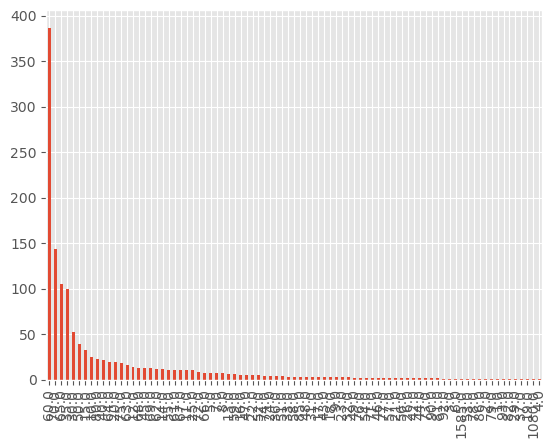

In [44]:
# bar chart showing run times of the shows
series['episode_run_time'].value_counts().plot(kind='bar');

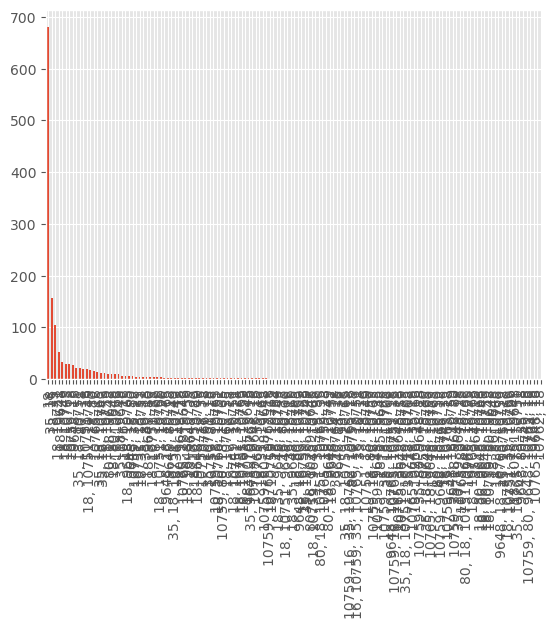

In [45]:
series['genres_ids'].value_counts().plot(kind='bar');


<AxesSubplot:>

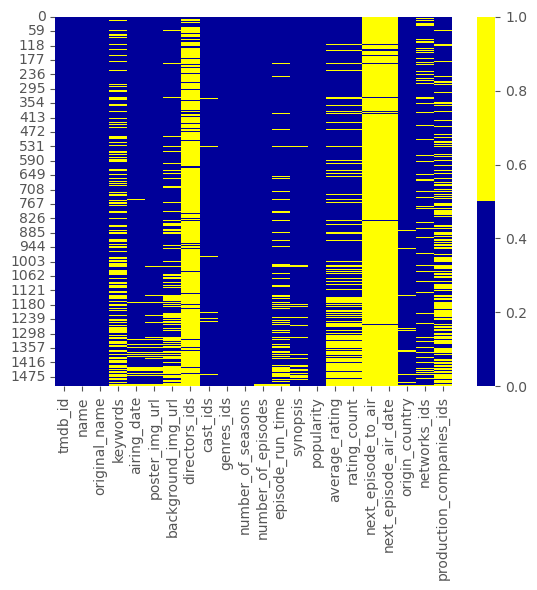

In [46]:
# Plot a heatmap of any missing data
#shows that are still on air (have a value in ?? columns don't have a value in average rating and rating count)
cols = series.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(series[cols].isnull(), cmap=sns.color_palette(colours))

<AxesSubplot:xlabel='popularity', ylabel='genres_ids'>

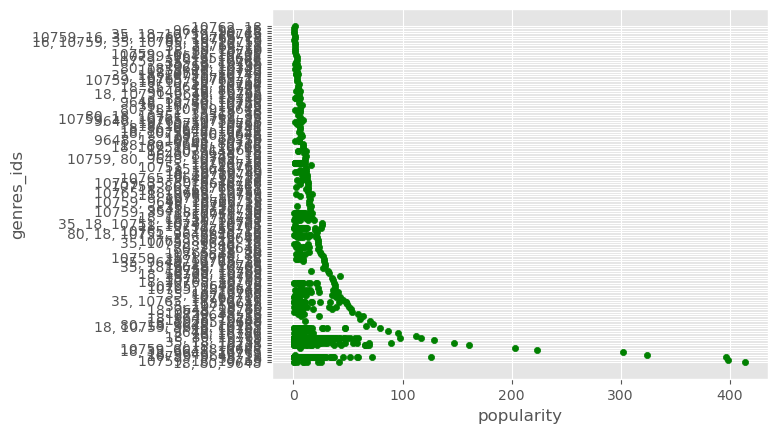

In [47]:
series.plot.scatter(x="popularity", y="genres_ids", color="green")

<AxesSubplot:xlabel='average_rating', ylabel='popularity'>

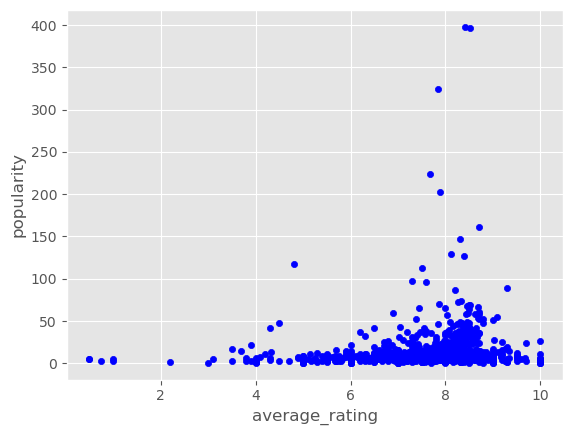

In [48]:
series.plot.scatter(x="average_rating", y="popularity", color="blue")

#this made me dig deeper into what popularity means. seems to be infinite....
#the most popular shows are those that are rated around an 8 (between 7 and 9), not shows rated as mcuh above 9. 
    #maybe 10s are documentary's are very niche where not a lot of people wathced them, but those that did really connected with
    #and/or appreciated the content... or are related to cast or directors - who knows

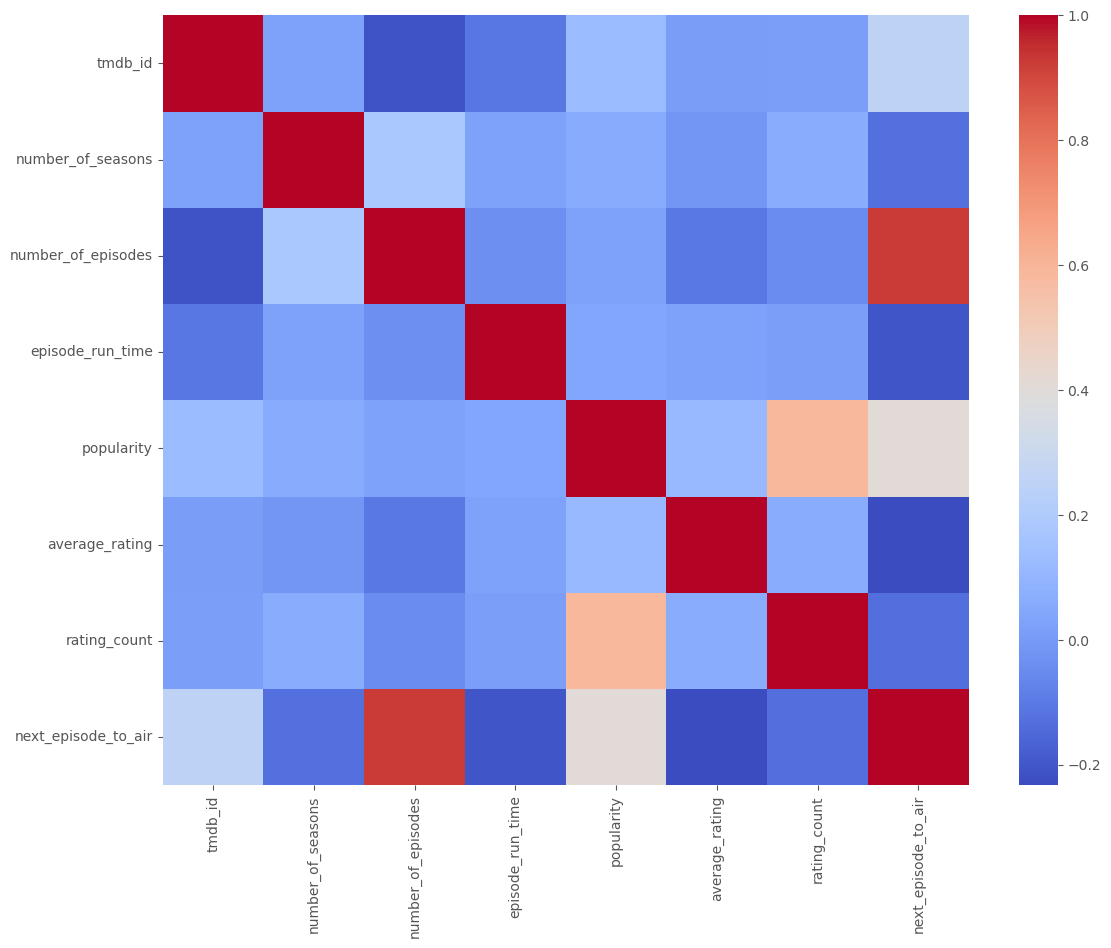

In [49]:
# Create tabular correlation matrix
corr = series.corr()
_, ax = plt.subplots(figsize=(13,10)) 

# Graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm')

### Genres

In [50]:
#the genres table only seems to have one purpose - to link to tables with an id for genre to get the name for it
    #so there's nothing to display here. The count is just 1 for each in the genres table
genres.name.value_counts()

Drama                 1
Crime                 1
Mystery               1
Action & Adventure    1
Sci-Fi & Fantasy      1
Comedy                1
Family                1
War & Politics        1
Soap                  1
History               1
Romance               1
Reality               1
Kids                  1
Animation             1
Documentary           1
Name: name, dtype: int64

### Networks

<AxesSubplot:>

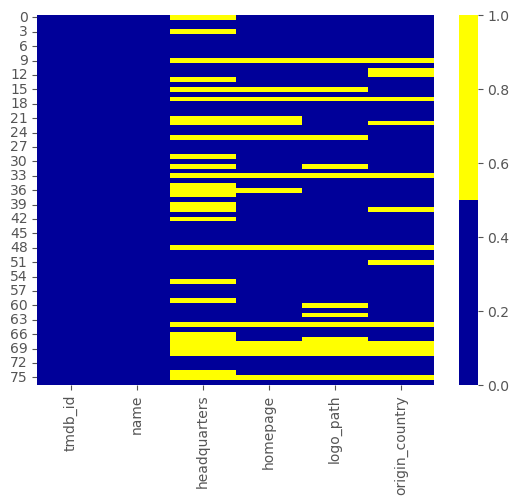

In [51]:
# Plot a heatmap of any missing data
#shows that are still on air (have a value in ?? columns don't have a value in average rating and rating count)
cols = networks.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(networks[cols].isnull(), cmap=sns.color_palette(colours))

### People

<AxesSubplot:>

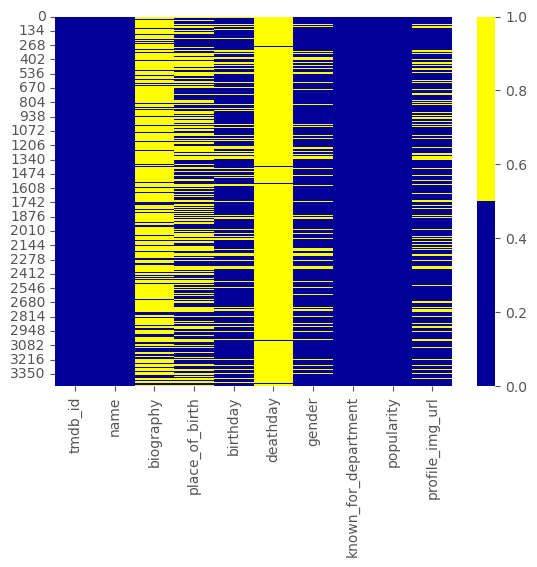

In [ ]:
# Plot a heatmap of any missing data
cols = people.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(people[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
#2 is male, 1 is female. There are more males than females in this dataset
people.gender.value_counts()

2.0    1660
1.0    1275
Name: gender, dtype: int64

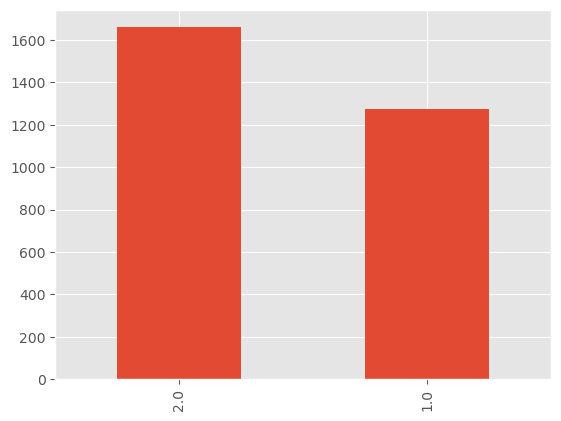

In [ ]:
# bar chart ratings - Notice that most chocolate is rated above a 3
people['gender'].value_counts().plot(kind='bar');


In [ ]:
people.place_of_birth.value_counts()
    #This is kind of interesting. probably better as a map to see which are close to the capital and which are rural
    #No surprise that the highest count is from Seoul, North Korea's capital (16th largest city in the world!)
    #Incheon is part of Seoul. I may change it in cleaning but they may be "getting into the weeds"?
        #we still get the gist though, w/o it there that most are from Seoul
    #there is no telling how big some of the numbers would be if the 379 that simply have South Korea specified the town
    #it will be nice to look at a list of all 303 unique places. I noticed in scrolling through on Kaggle that some listed
    #corea del sol (spanish for South Korea) I could find and convert those in cleaning and have them added to the proper place
    #but also I wonder how/why they're in Spanish. was it a spanish based company, is the actor of director of part Spanish 
        #decent r maybe just lived there and spoke it? In some of the shows and interviews I've watched, fluency and sometimes 
        #moving to another country to learn another language is highly valued and talked about. It can be a big part of education 
        #or them to be competitive in job world later

Seoul, South Korea                     551
South Korea                            379
Busan, South Korea                     134
Daegu, South Korea                      52
Incheon, South Korea                    46
                                      ... 
Sunchang, Jeollabuk-do, South Korea      1
Hoeryong, North Hamgyong, Korea          1
Yao, Japan                               1
Kangwon, South Korea                     1
Ilsan, Gyeonggi-do, South Korea          1
Name: place_of_birth, Length: 303, dtype: int64

In [ ]:
###people.plot.scatter(x="place_of_birth", y="popularity", color="green")

#wanted to compare birthplace and see if it had influence on popularity
    #but it looks like this would be better for the cleaning section if I do because 
    #the chart didn't work. The data types need to be changed. might show in tableau w/o changing though

<AxesSubplot:xlabel='gender', ylabel='popularity'>

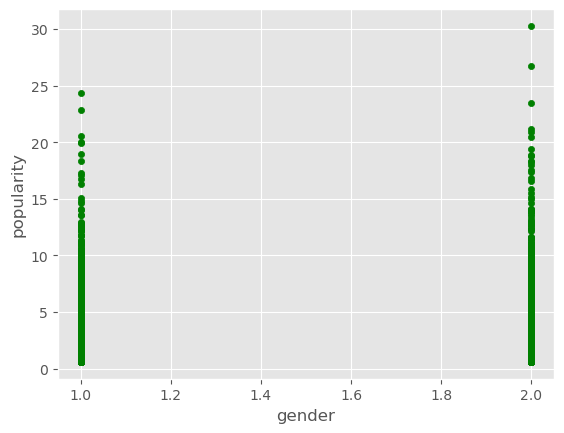

In [ ]:
people.plot.scatter(x="gender", y="popularity", color="green")

In [ ]:
people.known_for_department.value_counts()

Acting       3342
Directing     123
Name: known_for_department, dtype: int64

In [ ]:
people.known_for_department.value_counts()

Acting       3342
Directing     123
Name: known_for_department, dtype: int64

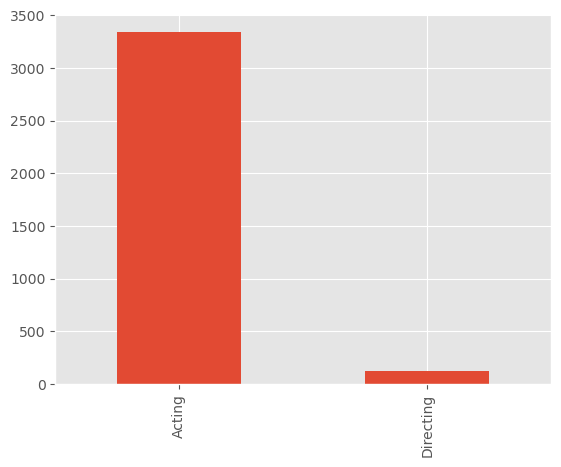

In [ ]:
# bar chart known for department. most of those known are actors. probably not much different from US entertainment where we
    #know actors much more than directors. 
people['known_for_department'].value_counts().plot(kind='bar');

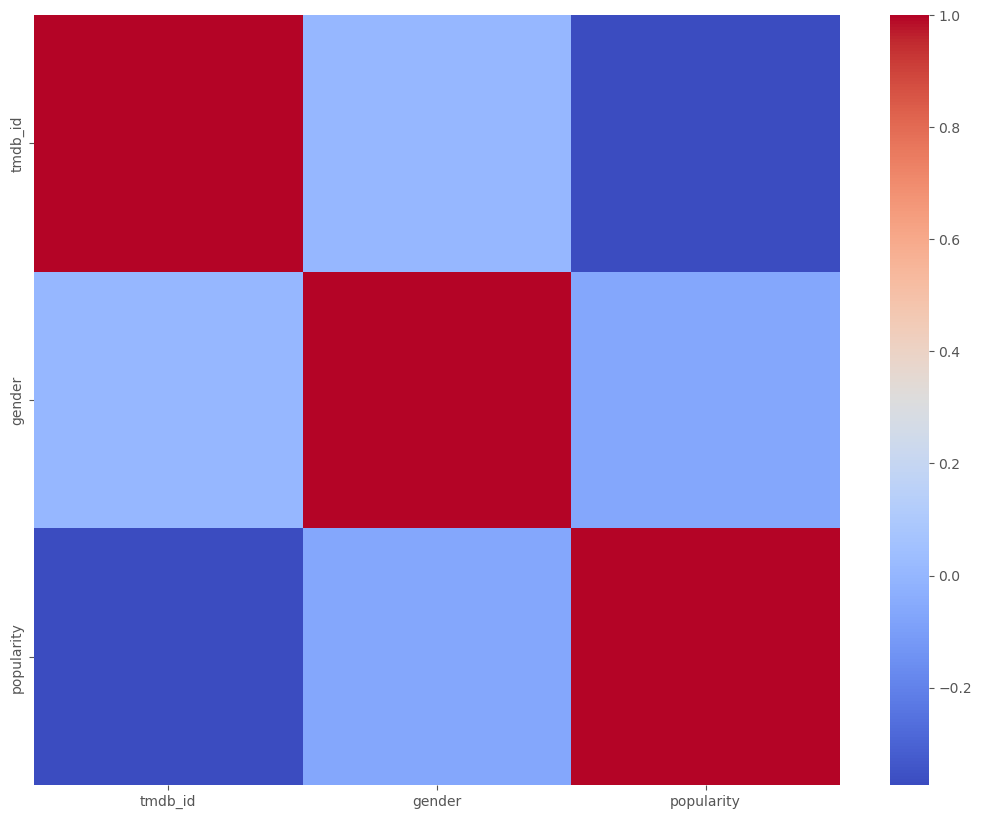

In [ ]:
# Create tabular correlation matrix
corr = people.corr()
_, ax = plt.subplots(figsize=(13,10)) 

# Graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm')

### Production Companies

In [ ]:
production_companies.origin_country.value_counts()

#Not surprising that Korea is very much the majority. Interesting that the US is second. It's a low number, but still...
#A lot of missing data in this dataset and I don't know what value it will add to overall project - unless I want to 
    #compare the origin country with which shows are highest ranking or something. But its obvious that KR will be top
    #I'm considering not using this dataset in the next sections of the project. May be the last you see of it :O

KR    169
US      7
JP      4
FR      1
IN      1
CN      1
Name: origin_country, dtype: int64

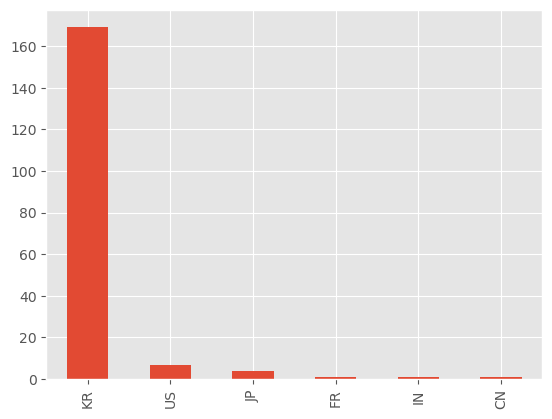

In [ ]:
production_companies['origin_country'].value_counts().plot(kind='bar');

***
<h1 style="background-color:gray; color:White; text-align:leftr">Summarize Your Results</h1>

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
    * I was surprised the popularity scoring turned out to be infinite and only goes to a little over 400 currently. 
        * Its pupolated automatically by the database itslef somehow. I've done searching online and haven't been able to get a great answer and I see that others have wondered the same thing. 
2. Do you have any concerns about your dataset? 
    * Well, its still usable but I am somewhat baffled by the popularity scoring. 
    * My main concern is the vastness of the dataset - it is overwhelming me during this checkpoint and I'm not looking forward to going through and cleaning multiple datasets.  
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?
    * 5 is too many tables to manage for this project and some may not be needed so I will be getting rid of at least one table and many rows from other tables.